In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks', rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('talk')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
import os
import gffutils
import itertools
import numpy as np
import pandas as pd
from Bio import SeqIO
from scipy import stats
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio.SeqFeature import SeqFeature, FeatureLocation

In [4]:
phenotypes = {'deces': 'death',
 'choc': 'septic shock',
 'passage_en_rea': 'admission to ICU',
 'pe_urinaire': 'urinary tract',
 'pe_digestive': 'digestive tract'}

In [5]:
res = []
for pheno in phenotypes:
    u = pd.read_csv(f'../out/associations/{pheno}/unitigs_filtered.tsv')
    g = pd.read_csv(f'../out/associations/{pheno}/gpa_filtered.tsv')
    s = pd.read_csv(f'../out/associations/{pheno}/struct_filtered.tsv')
    res.append((phenotypes[pheno],
                'lmm',
                'with covariates',
                u.shape[0],
                g.shape[0],
                s.shape[0]))
    u = pd.read_csv(f'../out/B2/{pheno}/unitigs_filtered.tsv')
    res.append((phenotypes[pheno],
                'lmm',
                'B2 with covariates',
                u.shape[0],
                np.nan,
                np.nan))
    u = pd.read_csv(f'../out/associations/{pheno}/nc_unitigs_filtered.tsv')
    g = pd.read_csv(f'../out/associations/{pheno}/nc_gpa_filtered.tsv')
    s = pd.read_csv(f'../out/associations/{pheno}/nc_struct_filtered.tsv')
    res.append((phenotypes[pheno],
                'lmm',
                'naïve',
                u.shape[0],
                g.shape[0],
                s.shape[0]))
r = pd.DataFrame(res,
                 columns=['phenotype', 'type', 'set',
                          'unitigs', 'gene presence absence', 'structural variants'])

In [6]:
r

,phenotype,type,set,unitigs,gene presence absence,structural variants
0,death,lmm,with covariates,0,0.0,0.0
1,death,lmm,B2 with covariates,0,NaN,NaN
2,death,lmm,naïve,0,0.0,0.0
3,septic shock,lmm,with covariates,0,0.0,0.0
4,septic shock,lmm,B2 with covariates,0,NaN,NaN
5,septic shock,lmm,naïve,1,2.0,0.0
6,admission to ICU,lmm,with covariates,1,0.0,1.0
7,admission to ICU,lmm,B2 with covariates,1,NaN,NaN
8,admission to ICU,lmm,naïve,1,0.0,0.0
9,urinary tract,lmm,with covariates,88,10.0,0.0


In [7]:
r = r.melt(id_vars=['phenotype', 'type', 'set'])

In [8]:
r.columns = ['phenotype', 'type', 'set', 'variant type', 'variants']
r['ln(variants)'] = r['variants'] + 1

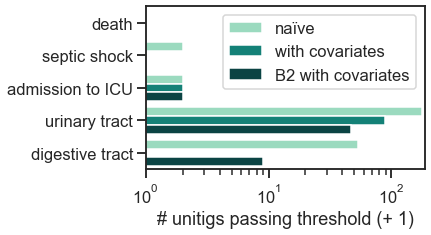

In [9]:
plt.figure(figsize=(5, 3))
sns.barplot(data=r[(r['type'] == 'lmm') & (r['variant type'] == 'unitigs')], 
            x='ln(variants)', y='phenotype', hue='set',
            hue_order=['naïve', 'with covariates', 'B2 with covariates'],
            palette=['xkcd:light teal',
                     'xkcd:teal', 'xkcd:dark teal'])
plt.xlim(1)
plt.ylabel('')
plt.xlabel('# unitigs passing threshold (+ 1)')

plt.legend(facecolor='w')

plt.xscale('log')

plt.savefig('unitigs_B2.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('unitigs_B2.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [10]:
res = []
for pheno in phenotypes:
    try:
        u = pd.read_csv(f'../out/associations/{pheno}/summary.tsv')
        shape = u.shape[0]
    except:
        shape = 0
    res.append((phenotypes[pheno],
                'lmm',
                'with covariates',
                shape))
    try:
        u = pd.read_csv(f'../out/B2/{pheno}/summary.tsv')
        shape = u.shape[0]
    except:
        shape = 0
    res.append((phenotypes[pheno],
                'lmm',
                'B2 with covariates',
                shape))
    try:
        u = pd.read_csv(f'../out/associations/{pheno}/nc_summary.tsv')
        shape = u.shape[0]
    except:
        shape = 0
    res.append((phenotypes[pheno],
                'lmm',
                'naïve',
                shape))
r = pd.DataFrame(res,
                 columns=['phenotype', 'type', 'set',
                          'genes'])

In [11]:
r

,phenotype,type,set,genes
0,death,lmm,with covariates,0
1,death,lmm,B2 with covariates,0
2,death,lmm,naïve,0
3,septic shock,lmm,with covariates,0
4,septic shock,lmm,B2 with covariates,0
5,septic shock,lmm,naïve,0
6,admission to ICU,lmm,with covariates,0
7,admission to ICU,lmm,B2 with covariates,1
8,admission to ICU,lmm,naïve,0
9,urinary tract,lmm,with covariates,12


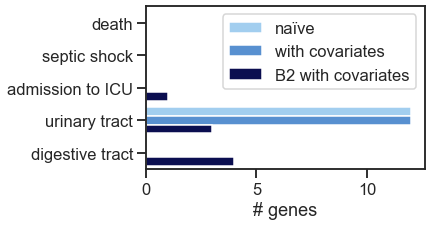

In [12]:
plt.figure(figsize=(5, 3))
sns.barplot(data=r[r['type'] == 'lmm'],
            x='genes', y='phenotype', hue='set',
            hue_order=['naïve', 'with covariates', 'B2 with covariates'],
            palette=['xkcd:light blue',
                     'xkcd:dark sky blue',
                     'xkcd:dark blue'])
# plt.xlim(1)
plt.ylabel('')
plt.xlabel('# genes')

plt.legend(facecolor='w')

plt.savefig('genes_B2.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('genes_B2.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [13]:
res = []
for pheno in phenotypes:
    try:
        u = pd.read_csv(f'../out/B2/{pheno}/summary.tsv',
                        sep='\t', index_col=0)
        g1 = u.index
        u['set'] = 'with covariates'
        u['phenotype'] = pheno
        u['p'] = -np.log10(u['avg-lrt-pvalue'])
        res.append(u)
    except:
        g1 = set()
r = pd.concat(res)

In [14]:
r = r[(r['phenotype'].isin(['pe_urinaire', 'pe_digestive'])) &
      (r['set'] == 'with covariates')]

In [15]:
puri = r[r['phenotype'] == 'pe_urinaire'].index
pdige = r[r['phenotype'] == 'pe_digestive'].index
both = puri.intersection(pdige)

In [16]:
len(puri), len(pdige), len(both)

(3, 4, 2)

In [17]:
r['pheno'] = ['both' if x in both
              else 'single'
              for x in r.index]

In [18]:
r['gene'] = ['pap operon' if 'pap' in x
             else 'other'
             for x in r.index]

In [19]:
r['avg-odds-ratio'] = np.power(2, r['avg-beta'])

In [20]:
r['entry'] = ['urinary tract' if 'urinaire' in x
              else 'digestive tract'
              for x in r['phenotype'].values]

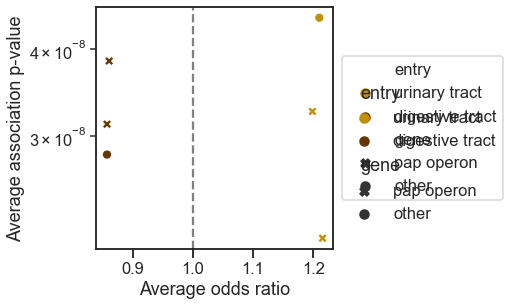

In [21]:
sns.relplot(data=r, hue='entry',
            style='gene',
            x='avg-odds-ratio', y='avg-lrt-pvalue',
            height=4.5,
            palette=['#bf9005', '#653700'],
            style_order=['pap operon', 'other'],
            markers=['X', 'o'])
plt.legend(facecolor='w',
           loc='center left',
           bbox_to_anchor=(1, 0.5))
plt.yscale('log')
plt.xlabel('Average odds ratio')
plt.ylabel('Average association p-value')
plt.axvline(1, ls='dashed', color='grey')
sns.despine(top=False, right=False)

plt.savefig('hits_B2.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('hits_B2.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);